<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-4-Sprint-1-NLP/blob/main/Module1/Aaron_Huizenga_LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
pip install squarify

In [2]:
# Importing the required libraries
import pandas.util.testing as tm
from collections import Counter

# Importing the necessary plot libraries
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Importing NLP libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


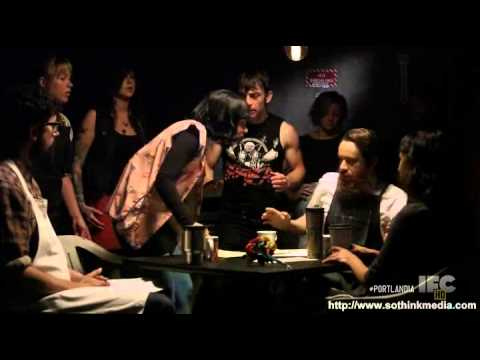

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'/content'

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/nusc2016/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# Apply lemmetization first before further analysis

In [6]:
# I want to check if all reviews are from the same coffee shop

shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [7]:
# I want to start by removing dates from "full_review_text"
# Then I want to combine check-in with check-ins from "full_review_text"
# I'll remove the number that appears after the dates
# and treat check-in as a stop word and remove it.

shops.head(20)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [8]:
# Here is a preview of full_text_review column
shops['full_review_text']

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object

In [9]:
# this will check the dtypes
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [10]:
# Here is a preview of star_rating column
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [11]:
shops['star_rating']

0        5.0 star rating 
1        4.0 star rating 
2        4.0 star rating 
3        2.0 star rating 
4        4.0 star rating 
              ...        
7611     4.0 star rating 
7612     5.0 star rating 
7613     4.0 star rating 
7614     3.0 star rating 
7615     4.0 star rating 
Name: star_rating, Length: 7616, dtype: object

#### - You want to use regex only to keep text from full_text_review
  * Same using regex only to keep numbers from star_rating column
  * I will tokenize full_text_review
  * I will use lambda expression to combine check-in and check-ins
  * I will add check-in to stop words so I can remove it
  * I will make everything lower case and begin analysis

In [12]:
import re

In [13]:
# I will start by creating sample data

sample = shops['full_review_text'][0]
sample

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [14]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [15]:
!pip install tokenizer

In [16]:
# Now I will remove dates using a regular expression

sample2 = re.sub('[^a-zA-Z]', ' ', sample)
sample2

'              check in Love love loved the atmosphere  Every corner of the coffee shop had its own style  and there were swings    I ordered the matcha latte  and it was muy fantastico  Ordering and getting my drink were pretty streamlined  I ordered on an iPad  which included all beverage selections that ranged from coffee to wine  desired level of sweetness  and a checkout system  I got my latte within minutes   I was hoping for a typical heart or feather on my latte  but found myself listing out all the possibilities of what the art may be  Any ideas  '

In [17]:
# I need to import spacy

import spacy
from spacy.tokenizer import Tokenizer

In [18]:
# Now I'll try to tokenize the text using spacy
# starting with instantiating spacy
# en_core_web_lg = language spacy should be using for tokenization

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [19]:
# This function will create the tokenizing sample

[token.text for token in tokenizer(sample2)]

['              ',
 'check',
 'in',
 'Love',
 'love',
 'loved',
 'the',
 'atmosphere',
 ' ',
 'Every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop',
 'had',
 'its',
 'own',
 'style',
 ' ',
 'and',
 'there',
 'were',
 'swings',
 '   ',
 'I',
 'ordered',
 'the',
 'matcha',
 'latte',
 ' ',
 'and',
 'it',
 'was',
 'muy',
 'fantastico',
 ' ',
 'Ordering',
 'and',
 'getting',
 'my',
 'drink',
 'were',
 'pretty',
 'streamlined',
 ' ',
 'I',
 'ordered',
 'on',
 'an',
 'iPad',
 ' ',
 'which',
 'included',
 'all',
 'beverage',
 'selections',
 'that',
 'ranged',
 'from',
 'coffee',
 'to',
 'wine',
 ' ',
 'desired',
 'level',
 'of',
 'sweetness',
 ' ',
 'and',
 'a',
 'checkout',
 'system',
 ' ',
 'I',
 'got',
 'my',
 'latte',
 'within',
 'minutes',
 '  ',
 'I',
 'was',
 'hoping',
 'for',
 'a',
 'typical',
 'heart',
 'or',
 'feather',
 'on',
 'my',
 'latte',
 ' ',
 'but',
 'found',
 'myself',
 'listing',
 'out',
 'all',
 'the',
 'possibilities',
 'of',
 'what',
 'the',
 'art',
 'may',
 'be',
 ' ',


In [20]:
# now apply this regex and tokenization to entire column of full_text_reviews. 

# a doc is a collection of tokens. each line is a doc. 
# a token is words, numbers, punctuation. 

result = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    # tokenizing each doc. 
    doc_token = [token.text for token in doc]
    result.append(doc_token)
    

shops['review_tokens'] = result
shops['review_tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: review_tokens, dtype: object

In [21]:
# now use regex to find dates, numbers, dollar symbols and remove them. 

# how to use regex to find dates
date_sample = shops['review_tokens'][0]
re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', sample)

['11/25/2016']

In [22]:
# I want to see if I can repeat the regex above that removes dates, but apply it
# to the entire column

no_dates = [re.sub('[^a-zA-Z ]', '', text) for text in shops['full_review_text']]

In [23]:
# This function will create a new column that has the same information as 
# full_review_text but without the dates

shops['no_dates'] = no_dates
shops['no_dates'].head()

0       checkin Love love loved the atmosphere Ever...
1      Listed in Date Night Austin Ambiance in Aust...
2       checkin Listed in Brunch Spots I loved the ...
3      Very cool decor Good drinks Nice seating  Ho...
4       checkin They are located within the Northcr...
Name: no_dates, dtype: object

In [24]:
# Now I'll repeat the tokenization step and the result should be without dates.

result2 = []
for doc in tokenizer.pipe(shops['no_dates'], batch_size=500):
  # this should tokenize each doc
  doc_token = [token.text for token in doc]
  result2.append(doc_token)


shops['review_tokens2'] = result2
shops['review_tokens2'].head()

0    [   , checkin, Love, love, loved, the, atmosph...
1    [  , Listed, in, Date, Night, Austin, Ambiance...
2    [   , checkin, Listed, in, Brunch, Spots, I, l...
3    [  , Very, cool, decor, Good, drinks, Nice, se...
4    [   , checkin, They, are, located, within, the...
Name: review_tokens2, dtype: object

In [25]:
# Now I'll ad check-in and check-ins to stop words

stop_words = nlp.Defaults.stop_words.union(['shop','coffee', 'place','im','checkin', 'checkins', "  ", "   ", "$", ' '])

In [26]:
# In order to get rid of the white space up front, I could remove the first index
# of everything in the list, or the other option would be to add double and tripple
# white spaces to stop words. 
# So putting spaces in stop words is the better option since double and tripple
# white spaces are actually located in other places within the doc.


results3 = []

for doc in tokenizer.pipe(shops['no_dates'], batch_size=500):
    doc_tokens = [] 
    
    for token in doc:
        if token.text.lower() not in stop_words:
            doc_tokens.append(token.text.lower())
            
    results3.append(doc_tokens)
    
shops['review_tokens3'] = results3
shops['review_tokens3'].head()

0    [love, love, loved, atmosphere, corner, style,...
1    [listed, date, night, austin, ambiance, austin...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [located, northcross, mall, shopping, center, ...
Name: review_tokens3, dtype: object

## Next up - remove "star_rating" from the column

In [27]:
star_sample = shops['star_rating'][0]
star_sample

' 5.0 star rating '

In [28]:
re.sub('[^1-9]', "", star_sample)

'5'

In [29]:

rating = [re.sub('[^1-9]',"",star_sample) for star_sample in shops['star_rating']]

shops['rating'] = rating
shops['rating'].head()

0    5
1    4
2    4
3    2
4    4
Name: rating, dtype: object

In [30]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
review_tokens       object
no_dates            object
review_tokens2      object
review_tokens3      object
rating              object
dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [31]:
shops['review_tokens3'][0]

['love',
 'love',
 'loved',
 'atmosphere',
 'corner',
 'style',
 'swings',
 'ordered',
 'matcha',
 'latte',
 'muy',
 'fantastico',
 'ordering',
 'getting',
 'drink',
 'pretty',
 'streamlined',
 'ordered',
 'ipad',
 'included',
 'beverage',
 'selections',
 'ranged',
 'wine',
 'desired',
 'level',
 'sweetness',
 'checkout',
 'system',
 'got',
 'latte',
 'minutes',
 'hoping',
 'typical',
 'heart',
 'feather',
 'latte',
 'found',
 'listing',
 'possibilities',
 'art',
 'ideas']

In [32]:
# This function should return the overall word count and token count.

count = Counter(shops['review_tokens3'][0])
count

Counter({'art': 1,
         'atmosphere': 1,
         'beverage': 1,
         'checkout': 1,
         'corner': 1,
         'desired': 1,
         'drink': 1,
         'fantastico': 1,
         'feather': 1,
         'found': 1,
         'getting': 1,
         'got': 1,
         'heart': 1,
         'hoping': 1,
         'ideas': 1,
         'included': 1,
         'ipad': 1,
         'latte': 3,
         'level': 1,
         'listing': 1,
         'love': 2,
         'loved': 1,
         'matcha': 1,
         'minutes': 1,
         'muy': 1,
         'ordered': 2,
         'ordering': 1,
         'possibilities': 1,
         'pretty': 1,
         'ranged': 1,
         'selections': 1,
         'streamlined': 1,
         'style': 1,
         'sweetness': 1,
         'swings': 1,
         'system': 1,
         'typical': 1,
         'wine': 1})

In [33]:
# I'll attempt to cast the "count" result into a dictionary and then
# cast the "a" into a list so that I can index it and obtain only a subset
# of the data if I need to
a = dict(count)

b = list(a.items())
b[:10]

[('love', 2),
 ('loved', 1),
 ('atmosphere', 1),
 ('corner', 1),
 ('style', 1),
 ('swings', 1),
 ('ordered', 2),
 ('matcha', 1),
 ('latte', 3),
 ('muy', 1)]

In [34]:
# The following function will instantiate the counter function
review_count = Counter()

In [35]:
# This particular function will count each word(token) in each doc in the 
# review_tokens column then update the counter above

shops['review_tokens3'].apply(lambda tokens: review_count.update(tokens))

review_count.most_common(10)

[('good', 3973),
 ('great', 3919),
 ('like', 3088),
 ('austin', 2252),
 ('love', 1935),
 ('time', 1884),
 ('food', 1836),
 ('nice', 1741),
 ('friendly', 1659),
 ('latte', 1615)]

In [36]:
# As before, I will cast the result of review_count into a dictionary.
c = dict(review_count)

# Now I will cast "c" into a list so that I can index it and obtain only
# a subset of the data if I need to.

d = list(c.items())

d[:10]

[('love', 1935),
 ('loved', 366),
 ('atmosphere', 969),
 ('corner', 163),
 ('style', 101),
 ('swings', 65),
 ('ordered', 941),
 ('matcha', 189),
 ('latte', 1615),
 ('muy', 5)]

In [37]:
shops.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating', 'review_tokens',
       'no_dates', 'review_tokens2', 'review_tokens3', 'rating'],
      dtype='object')

In [38]:
# Now I want to cast the rating column into an int to make it easier to use as logic.

shops['rating'] = pd.to_numeric(shops['rating'])

In [39]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
review_tokens       object
no_dates            object
review_tokens2      object
review_tokens3      object
rating               int64
dtype: object

In [40]:
# I want to count the number of words in review_tokens3 based on the # of ratings.
# Then I will create 2 different results, both for words that appear in 
# "good_review" and "bad_review" - thus creating a new df's containing just bad 
# and good reviews.

# bad review df
bad_reviews = shops[shops['rating'] <= 3]

# good review df
good_reviews = shops[shops['rating'] >= 4]

In [41]:
# This particular function will count the bad_review words

bad_review_count = Counter()
bad_reviews['review_tokens3'].apply(lambda tokens: bad_review_count.update(tokens))

bad_review_count.most_common(10)

[('good', 877),
 ('like', 876),
 ('food', 484),
 ('time', 478),
 ('great', 466),
 ('dont', 449),
 ('service', 445),
 ('people', 375),
 ('pretty', 363),
 ('nice', 346)]

In [42]:
# good review words. 

good_review_count = Counter()
good_reviews['review_tokens3'].apply(lambda tokens: good_review_count.update(tokens))

good_review_count.most_common(10)

[('great', 3453),
 ('good', 3096),
 ('like', 2212),
 ('austin', 1969),
 ('love', 1725),
 ('friendly', 1462),
 ('time', 1406),
 ('nice', 1395),
 ('food', 1352),
 ('latte', 1339)]

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [43]:
# I will try to create a df that puts good words review count into the df

gd = zip(good_review_count.keys(), good_review_count.values())

good = pd.DataFrame(gd, columns = ["good_reviews", "good_count"])
good.head()

,good_reviews,good_count
0,love,1725
1,loved,330
2,atmosphere,810
3,corner,131
4,style,72


In [44]:
# The following function will do the same but for bad word reviews instead.

bd = zip(bad_review_count.keys(), bad_review_count.values())

bad = pd.DataFrame(bd, columns = ["bad_reviews", "bad_count"])
bad.head()

,bad_reviews,bad_count
0,cool,165
1,decor,64
2,good,877
3,drinks,263
4,nice,346


In [45]:
# The following function should merge both df's

goodVbad = pd.merge(good, bad, left_on = "good_reviews",
                    right_on = "bad_reviews").drop(columns = "bad_reviews")

print(goodVbad.shape)
goodVbad.head()

(6242, 3)


,good_reviews,good_count,bad_count
0,love,1725,210
1,loved,330,36
2,atmosphere,810,159
3,corner,131,32
4,style,72,29


In [46]:
# what percent of these words appeared in good reviews
# what percent of these words appeard in bad reviews
word_count = Counter()
doc_appear = Counter()

for each_review in shops['review_tokens3']:
    word_count.update(each_review)
    doc_appear.update(set(each_review))
    
combo = zip(word_count.keys(), word_count.values())

df = pd.DataFrame(combo, columns = ['words', 'count'])

df['word_rank'] = df['count'].rank(method='first', ascending=False)

total = df['count'].sum()

df["total_pct"] = df['count'].apply(lambda x: x/total)

df['cumulative_pct'] = df['total_pct'].cumsum()

# how many times does each word appear in the entire document as 
# opposed to individual reviews

appear = pd.DataFrame(zip(doc_appear.keys(), doc_appear.values()), 
                      columns = ['words', 'doc_appear_cnt'])

total_docs = len(shops['review_tokens3'])

appear['appear_pct'] = appear['doc_appear_cnt'].apply(lambda x : x/total_docs)

df = df.merge(appear, on='words')

df = df.sort_values(by='word_rank')

df.head(10)

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
140,good,3973,1.0,0.011735,0.153051,2788,0.366071
126,great,3919,2.0,0.011575,0.133208,2836,0.372374
163,like,3088,3.0,0.009121,0.184312,2124,0.278887
41,austin,2252,4.0,0.006652,0.047618,1788,0.234769
0,love,1935,5.0,0.005715,0.005715,1500,0.196954
488,time,1884,6.0,0.005565,0.380418,1469,0.192883
364,food,1836,7.0,0.005423,0.307898,1365,0.179228
56,nice,1741,8.0,0.005142,0.061424,1463,0.192096
179,friendly,1659,9.0,0.004900,0.193395,1577,0.207064
8,latte,1615,10.0,0.004770,0.018738,1128,0.148109


In [47]:
# turn the code above into a function so that I can use it for 
# good reviews and bad reviews. 

def word_frequency(doc_column):

    word_count = Counter()
    doc_appear = Counter()

    for each_review in doc_column:
        word_count.update(each_review)
        doc_appear.update(set(each_review))

    combo = zip(word_count.keys(), word_count.values())

    df = pd.DataFrame(combo, columns = ['words', 'count'])

    df['word_rank'] = df['count'].rank(method='first', ascending=False)

    total = df['count'].sum()

    df["total_pct"] = df['count'].apply(lambda x: x/total)

    df['cumulative_pct'] = df['total_pct'].cumsum()

    # how many times does each word appear in the entire document as 
    # opposed to individual reviews

    appear = pd.DataFrame(zip(doc_appear.keys(), doc_appear.values()), 
                          columns = ['words', 'doc_appear_cnt'])

    total_docs = len(doc_column)

    appear['appear_pct'] = appear['doc_appear_cnt'].apply(lambda x : x/total_docs)

    df = df.merge(appear, on='words')

    df = df.sort_values(by='word_rank')

    return df

In [48]:
# word frequency analysis for all reviews

all_reviews = word_frequency(shops['review_tokens3'])

all_reviews.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
140,good,3973,1.0,0.011735,0.153051,2788,0.366071
126,great,3919,2.0,0.011575,0.133208,2836,0.372374
163,like,3088,3.0,0.009121,0.184312,2124,0.278887
41,austin,2252,4.0,0.006652,0.047618,1788,0.234769
0,love,1935,5.0,0.005715,0.005715,1500,0.196954


In [49]:
# word frequency analysis for good reviews

good_freq = word_frequency(good_reviews['review_tokens3'])
good_freq.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
126,great,3453,1.0,0.013091,0.138060,2492,0.405863
192,good,3096,2.0,0.011738,0.201268,2192,0.357003
199,like,2212,3.0,0.008386,0.215284,1559,0.253909
41,austin,1969,4.0,0.007465,0.048896,1547,0.251954
0,love,1725,5.0,0.006540,0.006540,1322,0.215309


In [50]:
# word frequency analysis for bad reviews

bad_freq = word_frequency(bad_reviews['review_tokens3'])
bad_freq.head()

,words,count,word_rank,total_pct,cumulative_pct,doc_appear_cnt,appear_pct
2,good,877,1.0,0.011724,0.014785,596,0.403794
29,like,876,2.0,0.011711,0.065438,565,0.382791
51,food,484,3.0,0.006470,0.087696,310,0.210027
182,time,478,4.0,0.006390,0.202195,353,0.239160
61,great,466,5.0,0.006230,0.105850,344,0.233062


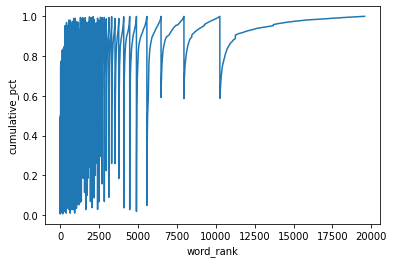

In [51]:
# This function will plot the distribution

sns.lineplot(x='word_rank', y='cumulative_pct', data=all_reviews);

<function matplotlib.pyplot.show>

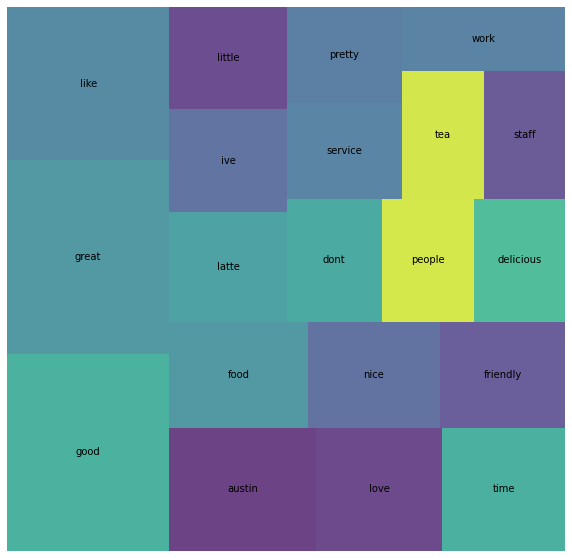

In [52]:
# top 20 words for all reviews in a squarify plot

reviews_top20 = df[df['word_rank'] <= 20]

reviews_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=reviews_top20['total_pct'], 
              label=reviews_top20['words'], 
             alpha = 0.8)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

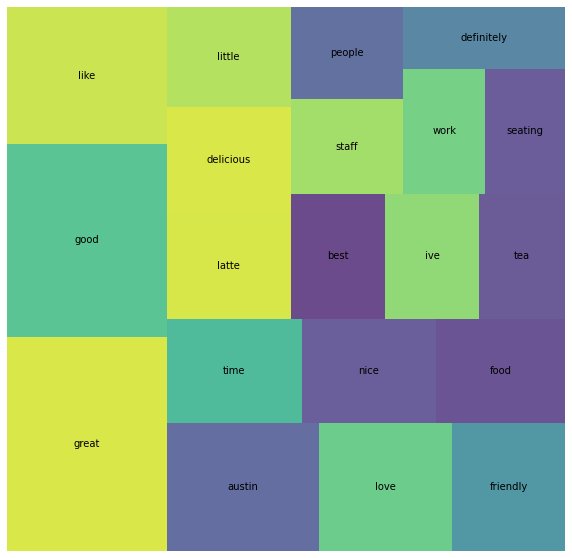

In [53]:
# same as above but for good reviews

good_top20 = good_freq[good_freq['word_rank'] <= 20]

good_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=good_top20['total_pct'], 
              label=good_top20['words'], 
             alpha = 0.8)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

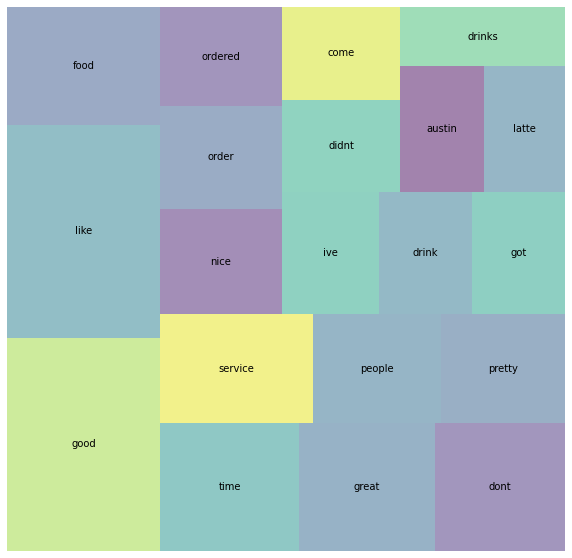

In [54]:
# top 20 words for bad reviews

bad_top20 = bad_freq[bad_freq['word_rank'] <= 20]

bad_top20

plt.figure(figsize = (10,10))
squarify.plot(sizes=bad_top20['total_pct'], 
              label=bad_top20['words'], 
             alpha = 0.5)
plt.axis('off')
plt.show

In [55]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, style,...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4


In [56]:
# applying lemmetization to my corpus of text. 

sample6 = shops['no_dates'][0]

nlp = spacy.load("en_core_web_lg")
text = nlp(sample6)

for token in text:
    print(token.text, "  ", token.lemma_)

          
checkin    checkin
Love    Love
love    love
loved    love
the    the
atmosphere    atmosphere
Every    every
corner    corner
of    of
the    the
coffee    coffee
shop    shop
had    have
its    -PRON-
own    own
style    style
and    and
there    there
were    be
swings    swing
I    -PRON-
ordered    order
the    the
matcha    matcha
latte    latte
and    and
it    -PRON-
was    be
muy    muy
fantastico    fantastico
Ordering    order
and    and
getting    get
my    -PRON-
drink    drink
were    be
pretty    pretty
streamlined    streamlined
I    -PRON-
ordered    order
on    on
an    an
iPad    iPad
which    which
included    include
all    all
beverage    beverage
selections    selection
that    that
ranged    range
from    from
coffee    coffee
to    to
wine    wine
desired    desire
level    level
of    of
sweetness    sweetness
and    and
a    a
checkout    checkout
system    system
I    -PRON-
got    get
my    -PRON-
latte    latte
within    within
minutes    minute

In [57]:
# The following function is used for getting lemmas of a doc

def lemma(docs):
    
    text = nlp(docs)
    
    lemmas = []
    
    for token in text:
        if ((token.is_stop == False) and 
            (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)
    return lemmas

In [60]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, style,...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4


In [63]:
!pip install scattertext

     |████████████████████████████████| 7.2MB 6.3MB/s 


In [64]:
import scattertext as st

In [65]:
shops['category'] = ['good_review' if (x is 4) | (x is 5) else 'bad_review' for x in shops['rating']]

In [66]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,no_dates,review_tokens2,review_tokens3,rating,category
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, 1, check-in, Love, love, loved...",checkin Love love loved the atmosphere Ever...,"[ , checkin, Love, love, loved, the, atmosph...","[love, love, loved, atmosphere, corner, style,...",5,good_review
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, Listed, in, Date, Night:, Austi...",Listed in Date Night Austin Ambiance in Aust...,"[ , Listed, in, Date, Night, Austin, Ambiance...","[listed, date, night, austin, ambiance, austin...",4,good_review
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",checkin Listed in Brunch Spots I loved the ...,"[ , checkin, Listed, in, Brunch, Spots, I, l...","[listed, brunch, spots, loved, eclectic, homey...",4,good_review
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, Very, cool, decor!, Good, drin...",Very cool decor Good drinks Nice seating Ho...,"[ , Very, cool, decor, Good, drinks, Nice, se...","[cool, decor, good, drinks, nice, seating, ove...",2,bad_review
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, 1, check-in, They, are, located...",checkin They are located within the Northcr...,"[ , checkin, They, are, located, within, the...","[located, northcross, mall, shopping, center, ...",4,good_review


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

